# Project: Wrangling and Analyze Data

In [2]:
import pandas as pd
import numpy as np
import requests
import json
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', 50)


## Data Gathering


#### Data source #1

In [3]:
tweet_archive = pd.read_csv("resources/twitter-archive-enhanced.csv")


#### Data source #2

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response=requests.get(url)
folder_name = 'resources'

with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
os.listdir(folder_name)

['image-predictions.tsv', 'tweet-json.txt', 'twitter-archive-enhanced.csv']

In [6]:
image_predictions = pd.read_csv(os.path.join(folder_name, 'image-predictions.tsv'), sep='\t')
# image_predictions.to_csv('image_predictions.csv', index=False)

#### Data source #3

In [7]:
tweet_list = []
with open(os.path.join(folder_name, 'tweet-json.txt'), mode='r') as file:
    for line in file:
        data=json.loads(line)
        tweet_list.append(data)
additional_data=pd.DataFrame(tweet_list, columns=['id', 'retweet_count', 'favorite_count', 'quoted_status_id'])
additional_data.sample()
# pd.DataFrame(tweet_list).to_csv('additional_data.csv', index=False)

,id,retweet_count,favorite_count,quoted_status_id
577,800751577355128832,3214,11701,NaN


## Assessing Data


In [8]:
print(tweet_archive.shape)
print(tweet_archive.info())
tweet_archive.head(10)

(2356, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [9]:
print(image_predictions.shape)
print(image_predictions.info())
image_predictions.head(10)

(2075, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
print(additional_data.shape)
print(additional_data.info())
additional_data.head(10)

(2354, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2354 non-null   int64  
 1   retweet_count     2354 non-null   int64  
 2   favorite_count    2354 non-null   int64  
 3   quoted_status_id  29 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 73.7 KB
None


,id,retweet_count,favorite_count,quoted_status_id
0,892420643555336193,8853,39467,NaN
1,892177421306343426,6514,33819,NaN
2,891815181378084864,4328,25461,NaN
3,891689557279858688,8964,42908,NaN
4,891327558926688256,9774,41048,NaN
5,891087950875897856,3261,20562,NaN
6,890971913173991426,2158,12041,NaN
7,890729181411237888,16716,56848,NaN
8,890609185150312448,4429,28226,NaN
9,890240255349198849,7711,32467,NaN


In [11]:
tweet_archive.name.value_counts()[:15]

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Name: name, dtype: int64

In [12]:
tweet_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [13]:
not_name=[]
for name in tweet_archive.name.unique():
    if name[0].isupper()==False:
        not_name.append(name)

not_name

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [14]:
upper_name=[]
for name in tweet_archive.name.unique():
    if name.isupper()==True:
        upper_name.append(name)

upper_name

['O', 'JD']

In [15]:
tweet_archive[tweet_archive.name=='O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None


In [16]:
tweet_archive[tweet_archive.name=='JD']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is JD (stands for ""just dog""). He's like Airbud but with trading card games instead of sports. 10/10 much skill https://t.co/zzueJV9jCF",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985629241344/photo/1,10,10,JD,None,None,None,None


In [17]:
all_columns = pd.Series(list(tweet_archive) + list(image_predictions) + list(additional_data))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

### Tidiness issues
1. All 3 tables are based on the same entity, therefore they should be merged to 1 table.

2. Dog stages spread across 4 different columns (`doggo`, `floofer`, `pupper`, `puppo`) 

3. Actual tweet `text` column contains a URL that should be on another column.

4. Dog breed and prediction (True/False) not in one Column

### Quality issues 
1. Table contains rows not required in analysis (rows indicating retweets, replies and quotes).

2. Some tweets are not dog ratings.

3.  Tweet `source` cloumn contains HTML script.

4. Dog stages representing `null` values as a string `None`.

5. The `rating_denominator` column contains values not 10.

6. The `rating_numerator` column contains values that are not consistent with the usual ratings.

7. Certain dog `name` values misrepresented. Also, `null` values misrepresented a string `None`.

8. Dog named "O" instead of "O'Malley".

9. Table contains columns not required in analysis.

10. Incorrect data types on some columns (id, twitter_id, timestamp, retweet_count, favorite_count).

## Cleaning Data


In [18]:
# Make copies of original pieces of data
tweet_archive_copy = tweet_archive.copy()
image_predictions_copy = image_predictions.copy()
additional_data_copy = additional_data.copy()

### Issue #1: All 3 tables are based on the same entity, therefore they should be merged to 1 table

#### Define: 
Merge the 3 tables (`tweet_archive_copy`, `image_predictions_copy`, `additional_data_copy`) into one table named `twitter_archive_merged`

#### Code

In [19]:
twitter_archive_merged = tweet_archive_copy.merge(image_predictions_copy, how='left', on='tweet_id'
                        ).merge(additional_data_copy, how='left', left_on='tweet_id', right_on='id')

In [20]:
print(len(twitter_archive_merged.columns))
len(all_columns) # 'tweet_id' column is duplicated here

32


33

#### Test

In [21]:
print(twitter_archive_merged.shape)
print(twitter_archive_merged.columns)
twitter_archive_merged.head()

(2356, 32)
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id', 'retweet_count',
       'favorite_count', 'quoted_status_id'],
      dtype='object')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,quoted_status_id
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8.924206e+17,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,8.921774e+17,6514.0,33819.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,8.918152e+17,4328.0,25461.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8.916896e+17,8964.0,42908.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8.913276e+17,9774.0,41048.0,NaN


### Issue #2: Dog stages spread across 4 different columns (`doggo`, `floofer`, `pupper`, `puppo`) 

#### Define
Join all 4 columns to form a cloumn of `dog_stages`

#### Code

In [22]:
dog_stages=twitter_archive_merged[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']]
a=dog_stages.replace('None', '')
twitter_archive_merged['dog_stages']=a.doggo +'-'+ a.floofer +'-'+ a.pupper +'-'+ a.puppo
twitter_archive_merged['dog_stages']=twitter_archive_merged['dog_stages'].replace({'---': np.nan
                                        ,'doggo---':'doggo'
                                        ,'--pupper-':'pupper'
                                        ,'---puppo':'puppo'
                                        ,'-floofer--':'floofer'
                                        ,'doggo---puppo':'doggo-puppo'
                                        ,'doggo-floofer--':'doggo-floofer'
                                        ,'doggo--pupper-':'doggo-pupper'})

#### Test

In [23]:
print(twitter_archive_merged.info())
twitter_archive_merged.sample(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,quoted_status_id,dog_stages
1594,686377065986265092,NaN,NaN,2016-01-11 02:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Birf. He thinks he's gone blind. 10/10 very frightened pupper https://t.co/oDkspjNWYX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686377065986265092/photo/1,10,10,Birf,None,None,pupper,None,https://pbs.twimg.com/media/CYaAS2kUoAINkye.jpg,1.0,German_shepherd,0.830816,True,Leonberg,0.076325,True,bloodhound,0.037449,True,6.863771e+17,637.0,2433.0,NaN,pupper
442,819588359383371776,NaN,NaN,2017-01-12 16:54:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jazzy. She just found out that sandwich wasn't for her. Shocked and puppalled. 13/10 deep breaths Jazzy https://t.co/52cItP0vIO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819588359383371776/photo/1,13,10,Jazzy,None,None,None,None,https://pbs.twimg.com/media/C1_DQn3UoAIoJy7.jpg,1.0,Cardigan,0.547935,True,basenji,0.116442,True,Shetland_sheepdog,0.101681,True,8.195884e+17,2271.0,10606.0,NaN,NaN


### Issue #3: Actual tweet `text` column contains a URL that should be on another column

#### Define
Extract the url into a different column `tweet_url`

#### Code

In [24]:
twitter_archive_merged['tweet_url'] = twitter_archive_merged['text'].str.extract('.+\n*(http.+)')

In [25]:
twitter_archive_merged['tweet_text'] = twitter_archive_merged['text'].str.extract('(.+).*http.+')

#### Test

In [26]:
twitter_archive_merged[['tweet_url', 'tweet_text']]

,tweet_url,tweet_text
0,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
1,https://t.co/0Xxu71qeIV,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10"
2,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
3,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
4,https://t.co/AtUZn91f7f,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek"
...,...,...
2351,https://t.co/4B7cOc1EDq,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10
2352,https://t.co/DWnyCjf2mx,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10
2353,https://t.co/y671yMhoiR,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af
2354,https://t.co/r7mOb2m0UI,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of


### Issue #4: Table contains rows not required in analysis (rows indicating retweets, replies and quotes)

#### Define
Remove rows containing retweets, replies, and quotes

#### Code

In [27]:
twitter_archive_merged=twitter_archive_merged[~(
                                                (twitter_archive_merged['retweeted_status_id'].notnull())
                                              | (twitter_archive_merged['in_reply_to_status_id'].notnull())
                                              | (twitter_archive_merged['quoted_status_id'].notnull())
                                                )
                                             ]
twitter_archive_merged.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,quoted_status_id,dog_stages,tweet_url,tweet_text
878,760656994973933572,NaN,NaN,2016-08-03 02:02:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rose. Her face is stuck like that. 11/10 would pet so heckin well https://t.co/tl3gNYdoq2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/760656994973933572/photo/1,https://twitter.com/dog_rates/status/760656994973933572/photo/1",11,10,Rose,None,None,None,None,https://pbs.twimg.com/media/Co5lf-KW8AAIwJw.jpg,1.0,golden_retriever,0.760546,True,Labrador_retriever,0.232079,True,redbone,0.002874,True,7.606570e+17,2210.0,7343.0,NaN,NaN,https://t.co/tl3gNYdoq2,This is Rose. Her face is stuck like that. 11/10 would pet so heckin well


In [28]:
2356-287

2069

#### Test

In [29]:
twitter_archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2355
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2069 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2069 non-null   object 
 4   source                      2069 non-null   object 
 5   text                        2069 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2066 non-null   object 
 10  rating_numerator            2069 non-null   int64  
 11  rating_denominator          2069 non-null   int64  
 12  name                        2069 non-null   object 
 13  doggo                       2069 

### Issue #5: Dog breed and prediction (True/False) not in one column

#### Define

- Select the first `True` (from p1 to p3) value of an role and the predicted dog (`pred_dog_breed`) of the first true value using `np.select`

- Default the predicted dog (`pred_dog_breed`) breed where `p1=p2=p3=False` to 'undefined'


#### Code

In [30]:
cond_list = [(twitter_archive_merged['p1_dog']==True)
            ,(twitter_archive_merged['p2_dog']==True)
            ,(twitter_archive_merged['p3_dog']==True)
            ,(twitter_archive_merged['p3_dog'].isnull())
             ]
choice_list = [(twitter_archive_merged['p1']), (twitter_archive_merged['p2']), (twitter_archive_merged['p3']), np.nan]

twitter_archive_merged['pred_dog_breed'] = np.select(condlist=cond_list, choicelist=choice_list, default='undefined')

twitter_archive_merged['prediction'] = np.select(condlist=cond_list, choicelist=cond_list, default=False)

#### Test

In [31]:
twitter_archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2355
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2069 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2069 non-null   object 
 4   source                      2069 non-null   object 
 5   text                        2069 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2066 non-null   object 
 10  rating_numerator            2069 non-null   int64  
 11  rating_denominator          2069 non-null   int64  
 12  name                        2069 non-null   object 
 13  doggo                       2069 

### Issue #6: Some tweets are not dog ratings

#### Define
- Remove rows where `pred_dog_breed` is `undefined`. There are the rows with columns `p1=p2=p3 = False`
- Remove rows where `pred_dog_breed` is `null`. The is done to improve the quality of the data

#### Code

In [32]:
# A quick observation
q=twitter_archive_merged[twitter_archive_merged['prediction']==False]
q

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,quoted_status_id,dog_stages,tweet_url,tweet_text,pred_dog_breed,prediction
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8.924206e+17,8853.0,39467.0,NaN,NaN,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,undefined,False
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1.0,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,8.875171e+17,12082.0,46959.0,NaN,NaN,https://t.co/20VrLAA8ba,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy),undefined,False
28,886680336477933568,NaN,NaN,2017-07-16 20:14:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Derek. He's late for a dog meeting. 13/10 pet...al to the metal https://t.co/BCoWue0abA,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886680336477933568/photo/1,13,10,Derek,None,None,None,None,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1.0,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False,8.866803e+17,4610.0,22798.0,NaN,NaN,https://t.co/BCoWue0abA,This is Derek. He's late for a dog meeting. 13/10 pet...al to the metal,undefined,False
57,881268444196462592,NaN,NaN,2017-07-01 21:49:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Elliot. He's a Canadian Forrest Pup. Unusual number of antlers for a dog. Sneaky tongue slip to celebrate #Canada150. 12/10 would pet https://t.co/cgwJwowTMC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881268444196462592/photo/1,12,10,Elliot,None,None,None,None,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1.0,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False,8.812684e+17,5358.0,23501.0,NaN,NaN,https://t.co/cgwJwowTMC,Meet Elliot. He's a Canadian Forrest Pup. Unusual number of antlers for a dog. Sneaky tongue slip to celebrate #Canada150. 12/10 would pet,undefined,False
58,880935762899988482,NaN,NaN,2017-06-30 23:47:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Louis. He's crossing. It's a big deal. 13/10 h*ckin breathtaking https://t.co/D0wb1GlKAt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880935762899988482/photo/1,13,10,Louis,None,None,None,None,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1.0,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False,8.809358e+17,2886.0,17346.0,NaN,NaN,https://t.co/D0wb1GlKAt,This is Louis. He's crossing. It's a big deal. 13/10 h*ckin breathtaking,undefined,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,666362758909284353,NaN,NaN,2015-11-16 

From the `q` dataframe above, it was observed visually that some images were erroneously ruled False (i.e., as 'not dogs') in all 3 predictions.
Neververtheless, these rows will be dropped from the dataframe in other to improve the quality of the data.

In [33]:
twitter_archive_merged['pred_dog_breed'].value_counts()

undefined             305
golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
                     ... 
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
silky_terrier           1
Irish_wolfhound         1
Name: pred_dog_breed, Length: 114, dtype: int64

In [34]:
twitter_archive_merged = twitter_archive_merged[   (twitter_archive_merged['pred_dog_breed']!='undefined') 
                                                & ~(twitter_archive_merged['pred_dog_breed'].isnull())]

#### Test

In [35]:
twitter_archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1666 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1666 non-null   object 
 4   source                      1666 non-null   object 
 5   text                        1666 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1666 non-null   object 
 10  rating_numerator            1666 non-null   int64  
 11  rating_denominator          1666 non-null   int64  
 12  name                        1666 non-null   object 
 13  doggo                       1666 

### Issue #7: Tweet source cloumn contains HTML script

#### Define
Extract the content of the HTML tag that represents the actual tweet `source`

#### Code

In [36]:
twitter_archive_merged['source'] = twitter_archive_merged['source'].str.extract('.*>(.+)<.*')

#### Test

In [37]:
twitter_archive_merged['source'].value_counts()

Twitter for iPhone    1635
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

### Issue #8: Dog stages representing `null` values as a string `None`

#### Define
This has been addressed as part of Issue #2

#### Code

#### Test

In [38]:
twitter_archive_merged['dog_stages'].value_counts()

pupper           166
doggo             54
puppo             21
floofer            7
doggo-pupper       7
doggo-puppo        1
doggo-floofer      1
Name: dog_stages, dtype: int64

### Issue #9: The `rating_denominator` column contains values not 10.

#### Define
Visually inspect the roles with `rating_denominator` is not (`!=`) equal to 10, and make corrections where necessary

Some `rating_numerators` will also be fixed here

#### Code

In [39]:
twitter_archive_merged[twitter_archive_merged['rating_denominator'] != 10].shape

(16, 37)

In [40]:
twitter_archive_merged[twitter_archive_merged['rating_denominator'] != 10
                      ][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


From the dataframe above, where `rating_denominator` is not (`!=`) equal to 10, we see that of the 16 values, only 6 actually have their ratings misrepresented.

row with `tweet_id = 810984652412424192` will be removed as it is not a twitter dog rating.

In [41]:
def set_rating(tweet_id, correct_numr, correct_denr, numerator='rating_numerator', denominator='rating_denominator'):
    
    row_index = twitter_archive_merged[twitter_archive_merged['tweet_id']==tweet_id].index
    twitter_archive_merged.loc[row_index, numerator]=correct_numr
    twitter_archive_merged.loc[row_index, denominator]=correct_denr
    
    corrected_row = twitter_archive_merged[twitter_archive_merged['tweet_id']==tweet_id]
    return corrected_row

In [42]:
twitter_archive_merged.drop(twitter_archive_merged[twitter_archive_merged['tweet_id']==810984652412424192].index
                            , axis=0, inplace= True)
set_rating(tweet_id=740373189193256964, correct_numr=14, correct_denr=10)
set_rating(tweet_id=722974582966214656, correct_numr=13, correct_denr=10)
set_rating(tweet_id=716439118184652801, correct_numr=11, correct_denr=10)
set_rating(tweet_id=682962037429899265, correct_numr=10, correct_denr=10)
set_rating(tweet_id=666287406224695296, correct_numr=9, correct_denr=10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,quoted_status_id,dog_stages,tweet_url,tweet_text,pred_dog_breed,prediction
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,an,None,None,None,None,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,6.662874e+17,71.0,152.0,NaN,NaN,https://t.co/d9NcXFKwLv,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,Maltese_dog,True


#### Test

In [43]:
twitter_archive_merged[twitter_archive_merged['rating_denominator'] != 10
                      ][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120
1843,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80


### Issue #10: The `rating_numerator` column contains values that are not consistent with the usual ratings.

#### Define
The lowest ratings will be visually inspected and appropriate fix will be done

#### Code

In [44]:
twitter_archive_merged['rating_numerator'].unique()

array([ 13,  12,  14,   5,  11,   6,   0,  10,  84,  75,  27,   3,   9,
         8,   7, 165,   4,  99,  80,  45,  60,  44, 121,  26,   2, 144,
        88], dtype=int64)

In [45]:
twitter_archive_merged[twitter_archive_merged['rating_numerator'].isin([0,2,3,4])
                      ][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
765,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4,10
1189,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3,10
1249,711306686208872448,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3,10
1303,707420581654872064,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,4,10
1701,680940246314430465,This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS,4,10
1764,678424312106393600,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,2,10
1938,673906403526995968,Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M,3,10
2070,671122204919246848,Two miniature golden retrievers here. Webbed paws. Don't walk very efficiently. Can't catch a tennis ball. 4/10s https://t.co/WzVLdSHJU7,4,10


By inspection, some rows above are not dog ratings and will be removed.

In [46]:
twitter_archive_merged.drop([765, 1189, 2183, 1303, 1701, 2070, 2288, 2316], axis=0, inplace= True)

#### Test

In [47]:
twitter_archive_merged[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10
...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10
2353,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10
2354,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10


### Issue #11: Certain dog `name` values misrepresented. Also, `unknown` values misrepresented a string `None`

#### Define
Set obvious dog name errors to `unknown`. Also set all `None` to `unknown`

#### Code

In [48]:
tweet_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [49]:
not_name=[]
for name in tweet_archive.name.unique():
    if name[0].isupper()==False:
        not_name.append(name)

not_name.append('None')

In [50]:
twitter_archive_merged['name'] = twitter_archive_merged['name'].replace(not_name, 'unknown')

#### Test

In [51]:
twitter_archive_merged['name'].value_counts()

unknown       477
Lucy           10
Cooper         10
Charlie        10
Oliver          9
             ... 
Carbon          1
Klein           1
DonDon          1
Chevy           1
Christoper      1
Name: name, Length: 830, dtype: int64

### Issue #12: Dog named "O" instead of "O'Malley"

#### Define
Replace "O" with "O'Malley"

#### Code

In [52]:
row_id = twitter_archive_merged[twitter_archive_merged.name=='O'].index
twitter_archive_merged.loc[row_id, 'name']="O'Malley"


#### Test

In [53]:
twitter_archive_merged[twitter_archive_merged.name=='O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,quoted_status_id,dog_stages,tweet_url,tweet_text,pred_dog_breed,prediction


In [54]:
twitter_archive_merged[twitter_archive_merged.name=='O\'Malley']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,quoted_status_id,dog_stages,tweet_url,tweet_text,pred_dog_breed,prediction
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,None,None,None,None,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1.0,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True,7.762015e+17,2919.0,10681.0,NaN,NaN,https://t.co/Pq150LeRaC,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af,Rottweiler,True


### Issue #13: Table contains columns not required in analysis

#### Define
Drop columnns that are not required or important

#### Code

In [55]:
print(twitter_archive_merged.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id', 'retweet_count',
       'favorite_count', 'quoted_status_id', 'dog_stages', 'tweet_url',
       'tweet_text', 'pred_dog_breed', 'prediction'],
      dtype='object')


In [56]:
drop_col = ['in_reply_to_status_id', 'in_reply_to_user_id', 'text', 'retweeted_status_id', 'retweeted_status_user_id'
            ,'retweeted_status_timestamp', 'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo','jpg_url'
            ,'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id', 'quoted_status_id']

twitter_archive_master = twitter_archive_merged.drop(columns=drop_col)

#### Test

In [57]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 1 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1657 non-null   int64  
 1   timestamp           1657 non-null   object 
 2   source              1657 non-null   object 
 3   rating_numerator    1657 non-null   int64  
 4   rating_denominator  1657 non-null   int64  
 5   name                1657 non-null   object 
 6   img_num             1657 non-null   float64
 7   retweet_count       1657 non-null   float64
 8   favorite_count      1657 non-null   float64
 9   dog_stages          257 non-null    object 
 10  tweet_url           1657 non-null   object 
 11  tweet_text          1657 non-null   object 
 12  pred_dog_breed      1657 non-null   object 
 13  prediction          1657 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(7)
memory usage: 247.4+ KB


### Issue #14: Incorrect data types on some columns (tweet_id, timestamp, retweet_count, favorite_count, img_num)

#### Define
Set the data types appropriately using `.astype()` method

#### Code

In [58]:
twitter_archive_master['tweet_id']=twitter_archive_master['tweet_id'].astype(str)
twitter_archive_master['timestamp']=pd.to_datetime(twitter_archive_master['timestamp'])
twitter_archive_master['retweet_count']=twitter_archive_master['retweet_count'].astype(int)
twitter_archive_master['favorite_count']=twitter_archive_master['favorite_count'].astype(int)
twitter_archive_master['img_num']=twitter_archive_master['img_num'].astype(int)

#### Test

In [59]:
twitter_archive_master.sample()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,img_num,retweet_count,favorite_count,dog_stages,tweet_url,tweet_text,pred_dog_breed,prediction
494,813187593374461952,2016-12-26 01:00:05+00:00,Twitter for iPhone,13,10,unknown,1,5096,22085,NaN,https://t.co/rvSANEsQZJ,We only rate dogs. Please don't send in other things like this very good Christmas tree. Thank you... 13/10,golden_retriever,True


In [60]:
twitter_archive_master.info()
twitter_archive_master

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 1 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1657 non-null   object             
 1   timestamp           1657 non-null   datetime64[ns, UTC]
 2   source              1657 non-null   object             
 3   rating_numerator    1657 non-null   int64              
 4   rating_denominator  1657 non-null   int64              
 5   name                1657 non-null   object             
 6   img_num             1657 non-null   int32              
 7   retweet_count       1657 non-null   int32              
 8   favorite_count      1657 non-null   int32              
 9   dog_stages          257 non-null    object             
 10  tweet_url           1657 non-null   object             
 11  tweet_text          1657 non-null   object             
 12  pred_dog_breed      1657 non-null 

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,img_num,retweet_count,favorite_count,dog_stages,tweet_url,tweet_text,pred_dog_breed,prediction
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,1,6514,33819,NaN,https://t.co/0Xxu71qeIV,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",Chihuahua,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,1,4328,25461,NaN,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,Chihuahua,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,1,8964,42908,NaN,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,Labrador_retriever,True
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,2,9774,41048,NaN,https://t.co/AtUZn91f7f,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",basset,True
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,13,10,unknown,1,3261,20562,NaN,https://t.co/kQ04fDDRmh,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,Chesapeake_Bay_retriever,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,5,10,unknown,1,41,111,NaN,https://t.co/4B7cOc1EDq,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,miniature_pinscher,True
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,6,10,unknown,1,147,311,NaN,https://t.co/DWnyCjf2mx,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,Rhodesian_ridgeback,True
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,9,10,unknown,1,47,128,NaN,https://t.co/y671yMhoiR,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,German_shepherd,True
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,7,10,unknown,1,48,132,NaN,https://t.co/r7mOb2m0UI,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,redbone,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [62]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
count,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000
mean,11.409777,10.446590,1.215450,2843.585999,9322.229330
std,7.416148,6.278054,0.575299,4843.142981,12666.369477
min,0.000000,10.000000,1.000000,16.000000,81.000000
25%,10.000000,10.000000,1.000000,653.000000,2197.000000
50%,11.000000,10.000000,1.000000,1442.000000,4489.000000
75%,12.000000,10.000000,1.000000,3266.000000,11780.000000
max,165.000000,150.000000,4.000000,79515.000000,132810.000000


In [63]:
twitter_archive_master.name.value_counts()

unknown       477
Lucy           10
Cooper         10
Charlie        10
Oliver          9
             ... 
Carbon          1
Klein           1
DonDon          1
Chevy           1
Christoper      1
Name: name, Length: 830, dtype: int64

In [64]:
twitter_archive_master.source.value_counts(normalize=True)

Twitter for iPhone    0.981291
Twitter Web Client    0.013277
TweetDeck             0.005432
Name: source, dtype: float64

### Insights:
1. The average favorite (like) count is much greater than the average retweet count. This is an indication that twitter users exploring the page typically favorite a tweet more often than they retweet them.

2. All tweets have at least one (1) image attached to them and over two-third of the tweets have only one image. A few tweets have over one image and the maximum number of images in any tweet is four (4).

3. Almost all the rating denominators are 10, while  few were above 10. These ones (above 10) were for cases where the number of dogs in the image(s) were more than one, so all dog was rated tegether with; *denominator = no. of dogs x 10*

4. Most of the dog names were not properly extracted so some fields with dog name tagged as "unknown" actually has a name mentioned in the tweet.

5. Of the available dog name data, the most popular dog names (each with a frequency of 10) are: Lucy, Cooper, and Charlie

6. Of the three (3) tweet sources in the data, the most common source, accounting for about 98% of the recorded sources is "Twitter for iPhone". This indicates that most of the tweets by WeRateDogs were made using an iPhone device.

7. There were some inaccuracies with the three (3) image predictions made. In some cases, where all 3 predictions were false, the actual image was actually of a dog.

### Visualization

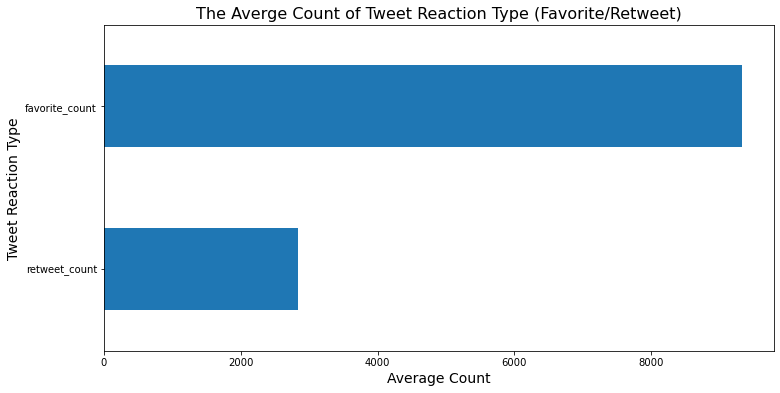

In [96]:
plt.figure(figsize=(12, 6))
twitter_archive_master[['retweet_count', 'favorite_count']].mean().plot(kind='barh')
plt.xlabel('Average Count', size=14)
plt.ylabel('Tweet Reaction Type', size=14)
plt.title('The Averge Count of Tweet Reaction Type (Favorite/Retweet)', size=16);
plt.savefig('tweet_reaction_plot.jpeg')

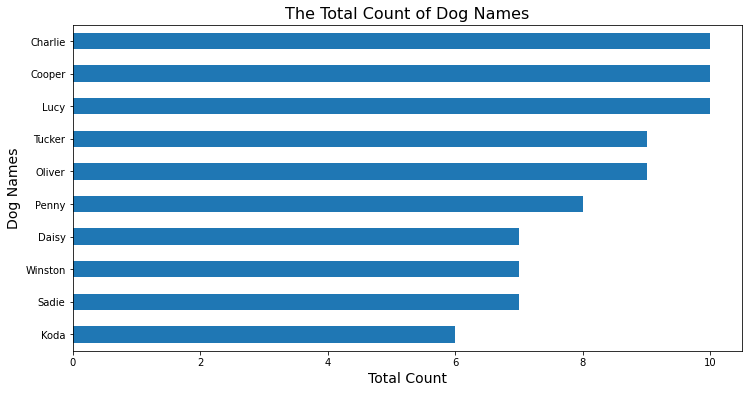

In [100]:
top_10_dog_names=twitter_archive_master.name.value_counts()[1:11]
plt.figure(figsize=(12, 6))
top_10_dog_names.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Total Count', size=14)
plt.ylabel('Dog Names', size=14)
plt.title('The Total Count of Dog Names', size=16);
plt.savefig('top_10_dog_names.jpeg')